# Entrega 1

##  Contexto 

En el este notebook se tratarán los datos extraidos desde un trabajo de Pattern Matching realizado en la plataforma online de arbimon.org de la Rainforest Connection (RFCx) la cual es una organización que busca construir e implementar sistemas de monitoreo acústico abiertos y escalables que puedan detener la tala ilegal y la caza furtiva, y pudiendo permitir la medición y el monitoreo de la biodiversidad.

Es en este último punto en el cual se enfoca el presente análisis, en el cual para estimar la diversidad de especies se realizó un análisis de Pattern Matching. Este consiste en contruir un template o molde para cada especie de ave posible que habita el área de estudio, luego se construye un playlist con los audios en los cuales se quieren encontrar las coinsidencias con los templates creados. Finalmente se deben validar de forma manual las coinsidencias, asignandoles uno de tres estados; presente, no presente o no validado.  

Los resultados de este análisis se pueden descargar en un archivo csv por cada template (uno por cada especie de ave) en el cual cada registro contiene los siguientes campos:

* **id:** identificador único de cada coincidencia, validada o no.
* **recording:** nombre de la grabación donde se encontró la coincidencia
* **site:** nombre del sitio de la grabación
* **fecha:** year, month, day, hour, minute
* **species:** nombre científico de la especie 
* **songtype:** tipo de vocalización del ave
* **x1, x2:** tiempo de inicio y fin de la conicidencia
* **y1, y2:** frecuancias máxima y mínima de la coincidencia
* **frequency:** frecunecia máxima de la grabación
* **validated:** present, not present o (not validated)
* **url:** url de la grabación
* **score:** puntaje de la considencia que va de 0 a 1, siendo 1 la coincidencia máxima
* **site_id:** identifacador único del sitio



## Preguntas

### Respecto a las especies

1. ¿Cuántas especies se encontraron?
2. ¿Cuáles son las especies más abundates?


### Respecto al tiempo

1. ¿Cual día es el con más presencia de especies?
2. ¿Cómo varía el número de especies presentes a lo largo de los días?
3. ¿Cómo varía el número de especies presentes cada 24 horas?


### Respecto al espacio

1. ¿En que sitios se detectó la presencia de más especies?
2. ¿Existe algún patrón espacial en la presencia de especies?

## Índice

### 1. Limpieza
* Unir todos los datos
* Crear reporte para comparar con datos anteriores
* Buscar nulos
* Crear columna datetime
* Eliminar columnas no necesarias
* Guardar como .csv


### 2. Formato
* Resamplear cada 5 min
* Hacer columna species_cont (conteo de especies)
* Guardar como csv

### 3. EDA
* Respecto a las especies
* Respecto al tiempo
* Respecto al espacio

### 1. Limpieza

In [29]:
# importar y unir csv

import pandas as pd
import glob
import os

# Ruta de la carpeta donde están los CSV de cada especie
carpeta = r'C:\Users\camil\OneDrive - Universidad Austral de Chile\analisis_tesis\riqueza\chanchan_015'  

# Buscar todos los archivos CSV en la carpeta
archivos_csv = glob.glob(os.path.join(carpeta, '*.csv'))

# Leer y concatenar todos los CSV en un solo DataFrame
df = pd.concat([pd.read_csv(f) for f in archivos_csv], ignore_index=True)

# Guardar el DataFrame combinado en un nuevo CSV
df.to_csv(r'C:\Users\camil\OneDrive - Universidad Austral de Chile\datascience1\proyectoDS_parte1\Data_Science_ll\entrega_1\reporte_riqueza.csv', index=False)


In [30]:
#df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112098 entries, 0 to 112097
Data columns (total 19 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         112098 non-null  int64  
 1   recording  112098 non-null  object 
 2   site       112098 non-null  object 
 3   year       112098 non-null  int64  
 4   month      112098 non-null  int64  
 5   day        112098 non-null  int64  
 6   hour       112098 non-null  int64  
 7   minute     112098 non-null  int64  
 8   species    112098 non-null  object 
 9   songtype   112098 non-null  object 
 10  x1         112098 non-null  float64
 11  x2         112098 non-null  float64
 12  y1         112098 non-null  int64  
 13  y2         112098 non-null  int64  
 14  frequency  112098 non-null  int64  
 15  validated  112098 non-null  object 
 16  url        112098 non-null  object 
 17  score      112098 non-null  float64
 18  site_id    112098 non-null  int64  
dtypes: float64(3), int64(10

In [31]:
# Esto mostrará únicamente las filas que tienen uno o más valores faltantes (NaN o None) en cualquier columna del DataFrame

registros_con_nulos = df[df.isnull().any(axis=1)]
print(registros_con_nulos)


Empty DataFrame
Columns: [id, recording, site, year, month, day, hour, minute, species, songtype, x1, x2, y1, y2, frequency, validated, url, score, site_id]
Index: []


No se encintraron valores nulos.

Para un mejor entendimiento de los datos se realizará un reporte con la librería *sweetviz*.

In [11]:
import sweetviz as sv

# Generar el reporte de Sweetviz

reporte = sv.analyze(df)
reporte.show_html(r'C:\Users\camil\OneDrive - Universidad Austral de Chile\datascience1\proyectoDS_parte1\Data_Science_ll\entrega_1\reporte_riqueza.html')


                                             |          | [  0%]   00:00 -> (? left)

Report C:\Users\camil\OneDrive - Universidad Austral de Chile\datascience1\proyectoDS_parte1\Data_Science_ll\entrega_1\reporte_riqueza.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


**URL del reporte:** file:///C:/Users/camil/OneDrive%20-%20Universidad%20Austral%20de%20Chile/datascience1/proyectoDS_parte1/Data_Science_ll/entrega_1/reporte_riqueza.html

**Insights**

* 11,326 presencias
* 100,472 not present
* 300 not validated 

* 21 sitios

* 30 especies

* Score
    * MAX   0.956
    * MIN   0.150
    * AVG   0.219
    * MED   0.342

Dado que el trabajo se centra en evaluar la dinámica temporal espacial y temporal de las aves, se trbajará solo con los registros validados como presentes.

In [32]:
# crear df con solo presencias

df_validated = df[df['validated'] == 'present']
df_validated.head()

,id,recording,site,year,month,day,hour,minute,species,songtype,x1,x2,y1,y2,frequency,validated,url,score,site_id
1255,1012265410,SMM09595_20231008_144000.wav,P37-SMM09595,2023,10,8,14,40,Anairetes parulus,Common Song,5.5680,6.92267,1875,5578,12000,present,https://rfcx-streams-production.s3.eu-west-1.a...,0.335732,53992
1553,1012268009,SMM09360_20231010_104000.wav,P23_SMM09360,2023,10,10,10,40,Anairetes parulus,Common Song,21.1627,22.51730,1875,5578,12000,present,https://rfcx-streams-production.s3.eu-west-1.a...,0.403137,48816
1916,1012274410,SMM09360_20231009_182500.wav,P23_SMM09360,2023,10,9,18,25,Anairetes parulus,Common Song,31.4560,32.81070,1875,5578,12000,present,https://rfcx-streams-production.s3.eu-west-1.a...,0.464491,48816
1967,1012274461,SMM09360_20231009_085500.wav,P23_SMM09360,2023,10,9,8,55,Anairetes parulus,Common Song,57.0240,58.37870,1875,5578,12000,present,https://rfcx-streams-production.s3.eu-west-1.a...,0.257202,48816
1970,1012274464,SMM09360_20231009_085000.wav,P23_SMM09360,2023,10,9,8,50,Anairetes parulus,Common Song,56.3947,57.74930,1875,5578,12000,present,https://rfcx-streams-production.s3.eu-west-1.a...,0.453465,48816


In [33]:
# crear columna datetime a partir de year, month, day, hour y minute
 
df_validated['datetime'] = pd.to_datetime(df_validated[['year', 'month', 'day', 'hour', 'minute']])
df_validated.head()

C:\Users\camil\AppData\Local\Temp\ipykernel_11192\53947806.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_validated['datetime'] = pd.to_datetime(df_validated[['year', 'month', 'day', 'hour', 'minute']])


,id,recording,site,year,month,day,hour,minute,species,songtype,x1,x2,y1,y2,frequency,validated,url,score,site_id,datetime
1255,1012265410,SMM09595_20231008_144000.wav,P37-SMM09595,2023,10,8,14,40,Anairetes parulus,Common Song,5.5680,6.92267,1875,5578,12000,present,https://rfcx-streams-production.s3.eu-west-1.a...,0.335732,53992,2023-10-08 14:40:00
1553,1012268009,SMM09360_20231010_104000.wav,P23_SMM09360,2023,10,10,10,40,Anairetes parulus,Common Song,21.1627,22.51730,1875,5578,12000,present,https://rfcx-streams-production.s3.eu-west-1.a...,0.403137,48816,2023-10-10 10:40:00
1916,1012274410,SMM09360_20231009_182500.wav,P23_SMM09360,2023,10,9,18,25,Anairetes parulus,Common Song,31.4560,32.81070,1875,5578,12000,present,https://rfcx-streams-production.s3.eu-west-1.a...,0.464491,48816,2023-10-09 18:25:00
1967,1012274461,SMM09360_20231009_085500.wav,P23_SMM09360,2023,10,9,8,55,Anairetes parulus,Common Song,57.0240,58.37870,1875,5578,12000,present,https://rfcx-streams-production.s3.eu-west-1.a...,0.257202,48816,2023-10-09 08:55:00
1970,1012274464,SMM09360_20231009_085000.wav,P23_SMM09360,2023,10,9,8,50,Anairetes parulus,Common Song,56.3947,57.74930,1875,5578,12000,present,https://rfcx-streams-production.s3.eu-west-1.a...,0.453465,48816,2023-10-09 08:50:00


In [34]:
# eliminar columnas innecesarias

# las siguientes columnas no son necesarias para el análisis, ya que están fuera de los objetivos del proyecto.

df_validated = df_validated.drop(columns=['songtype', 'x1', 'x2', 'y1', 'y2', 'frequency'])
df_validated.head()

,id,recording,site,year,month,day,hour,minute,species,validated,url,score,site_id,datetime
1255,1012265410,SMM09595_20231008_144000.wav,P37-SMM09595,2023,10,8,14,40,Anairetes parulus,present,https://rfcx-streams-production.s3.eu-west-1.a...,0.335732,53992,2023-10-08 14:40:00
1553,1012268009,SMM09360_20231010_104000.wav,P23_SMM09360,2023,10,10,10,40,Anairetes parulus,present,https://rfcx-streams-production.s3.eu-west-1.a...,0.403137,48816,2023-10-10 10:40:00
1916,1012274410,SMM09360_20231009_182500.wav,P23_SMM09360,2023,10,9,18,25,Anairetes parulus,present,https://rfcx-streams-production.s3.eu-west-1.a...,0.464491,48816,2023-10-09 18:25:00
1967,1012274461,SMM09360_20231009_085500.wav,P23_SMM09360,2023,10,9,8,55,Anairetes parulus,present,https://rfcx-streams-production.s3.eu-west-1.a...,0.257202,48816,2023-10-09 08:55:00
1970,1012274464,SMM09360_20231009_085000.wav,P23_SMM09360,2023,10,9,8,50,Anairetes parulus,present,https://rfcx-streams-production.s3.eu-west-1.a...,0.453465,48816,2023-10-09 08:50:00


In [35]:
# guradar df_validated en un nuevo csv
df_validated.to_csv(r'C:\Users\camil\OneDrive - Universidad Austral de Chile\datascience1\proyectoDS_parte1\Data_Science_ll\entrega_1\riqueza_validados.csv', index=False)

Para finalizar la etapa de limpieza se volverá a crear un reporte con sweetviz, pero esta vez para comparar el datafreme de inicio (crudo) con el actual (limpio)

In [36]:
# reporte de comparación entre distintos umbrales.

import sweetviz as sv
df1 = pd.read_csv(r'C:\Users\camil\OneDrive - Universidad Austral de Chile\datascience1\proyectoDS_parte1\Data_Science_ll\entrega_1\reporte_riqueza.csv')
df2 = pd.read_csv(r'C:\Users\camil\OneDrive - Universidad Austral de Chile\datascience1\proyectoDS_parte1\Data_Science_ll\entrega_1\riqueza_validados.csv')

# Opcional: puedes dar nombres a los DataFrames para que aparezcan en el reporte
reporte = sv.compare([df1, "Crudo"], [df2, "Limpio"])

reporte.show_html("reporte_comparacion.html")


                                             |          | [  0%]   00:00 -> (? left)

Report reporte_comparacion.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


**URL del reporte:** file:///C:/Users/camil/OneDrive%20-%20Universidad%20Austral%20de%20Chile/datascience1/proyectoDS_parte1/Data_Science_ll/entrega_1/reporte_comparacion.html


**Insights**

* 11,326 presencias

* 21 sitios

* 30 especies

* Score
    * MAX   0.956
    * MIN   0.150
    * AVG   0.358
    * MED   0.342

### 2. Formato

Para poder trabajar de mejor forma la variabilidad temporal se homogeneizarán los intervalos de tiempo. Esto dado que algunas horas están sub representadas (noche y madrugada) y otras sobrerepresentadas (mañana y tarde). Para esto se remuestraran cada 5 minutos.

Luego se creará una columna llamada 'species_count' para poder contar el número de especies presentes en cada unidad de tiempo y sitio, esto con el fin de facilitar los análisis posteriores.

In [44]:
import pandas as pd
import numpy as np

# Cargar el archivo CSV limpio y validado
data_path = r'C:\Users\camil\OneDrive - Universidad Austral de Chile\datascience1\proyectoDS_parte1\Data_Science_ll\entrega_1\riqueza_validados.csv'
data = pd.read_csv(data_path)
data['datetime'] = pd.to_datetime(data['datetime'])


# Redondear o truncar los valores datetime al intervalo de 5 minutos más cercano (hacia abajo)
data['datetime_5min'] = data['datetime'].dt.floor('5T')

# Crear un rango completo de datetime cada 5 minutos desde el mínimo al máximo
start_date = pd.to_datetime('2023-10-08 00:00:00') # Fecha mínima del df
end_date = pd.to_datetime('2023-10-10 23:55:00') # Fecha máxima del df
date_range = pd.date_range(start=start_date, end=end_date, freq='5T')

# Obtener lista única de sites
sites = data['site'].unique()

# Crear todas las combinaciones posibles de datetime cada 5 minutos y site
from itertools import product
all_combinations = pd.DataFrame(product(date_range, sites), columns=['datetime_5min', 'site'])

# Agrupar el DataFrame original para contar especies únicas por datetime_5min y site
grouped = data.groupby(['datetime_5min', 'site'])['species'].nunique().reset_index()
grouped = grouped.rename(columns={'species': 'species_count'})

# Hacer merge para tener todas las combinaciones y rellenar con 0 donde no haya datos
result = pd.merge(all_combinations, grouped, on=['datetime_5min', 'site'], how='left')
result['species_count'] = result['species_count'].fillna(0).astype(int)

result

C:\Users\camil\AppData\Local\Temp\ipykernel_11192\4073518454.py:11: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  data['datetime_5min'] = data['datetime'].dt.floor('5T')
C:\Users\camil\AppData\Local\Temp\ipykernel_11192\4073518454.py:16: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  date_range = pd.date_range(start=start_date, end=end_date, freq='5T')


,datetime_5min,site,species_count
0,2023-10-08 00:00:00,P37-SMM09595,0
1,2023-10-08 00:00:00,P23_SMM09360,0
2,2023-10-08 00:00:00,P07-SMM09344,0
3,2023-10-08 00:00:00,P04_SMM09557,0
4,2023-10-08 00:00:00,P19_SMM09396,0
...,...,...,...
18139,2023-10-10 23:55:00,P02_SMM09261,0
18140,2023-10-10 23:55:00,P26_SMM09319,0
18141,2023-10-10 23:55:00,P20_SMM09279,0
18142,2023-10-10 23:55:00,P43-SMM09315,0


In [45]:
result.to_csv(r'C:\Users\camil\OneDrive - Universidad Austral de Chile\datascience1\proyectoDS_parte1\Data_Science_ll\entrega_1\riqueza_5min.csv', index=False)

### 3. EDA

**Respecto a las especies**

Para esto se trabajará con el dataframe que contiene solo los validado como presente y sin re muestrear cada 5 min

In [ ]:
file_path = r'C:\Users\camil\OneDrive - Universidad Austral de Chile\datascience1\proyectoDS_parte1\Data_Science_ll\entrega_1\riqueza_validados.csv'

df = pd.read_csv(file_path)

unique_species_count = df['species'].nunique()
print(f"Número de valores únicos en la columna 'species': {unique_species_count}")

Número de valores únicos en la columna 'species': 30


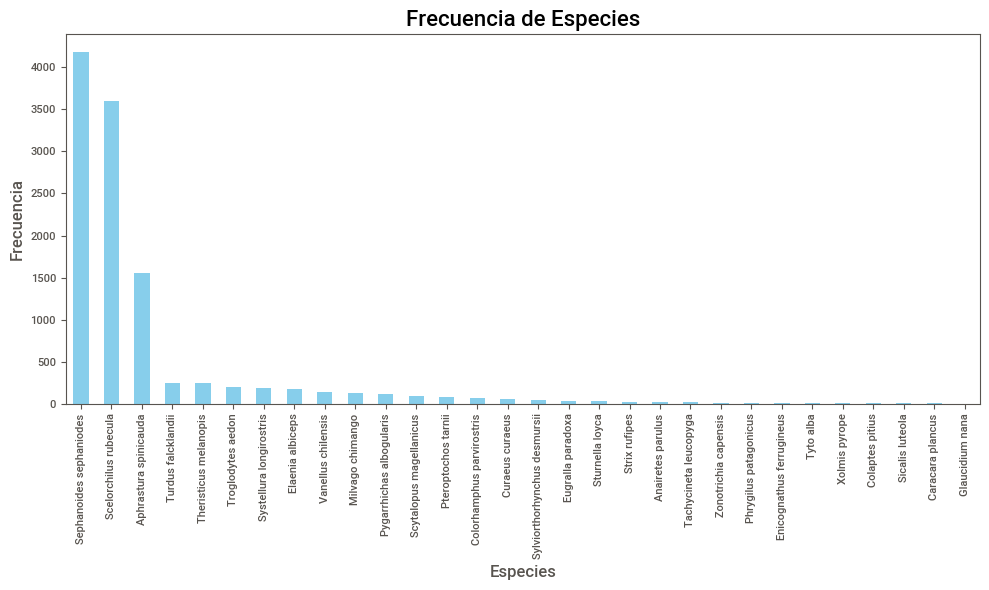

In [41]:
import matplotlib.pyplot as plt

# Contar la frecuencia de cada especie
species_counts = df['species'].value_counts()

# Ordenar de mayor a menor
species_counts = species_counts.sort_values(ascending=False)

# Crear el histograma
plt.figure(figsize=(10, 6))
species_counts.plot(kind='bar', color='skyblue')
plt.title('Frecuencia de Especies', fontsize=16)
plt.xlabel('Especies', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### Insights

Durante el periodo de tiempo estudiado, se detectó la presencia de un total de **30 especies de aves distintas**, siendo *Sephanoides sephaniodes*, *Scelorchilus rubecula* y *Aphrastura spinicauda* las más abundantes.

**Respecto al tiempo**

Para estos análisis se utilizará el conjunto de datos remuestrados cada 5 minutos.

In [46]:
file_path = r'C:\Users\camil\OneDrive - Universidad Austral de Chile\datascience1\proyectoDS_parte1\Data_Science_ll\entrega_1\riqueza_5min.csv'

df = pd.read_csv(file_path)

# Convertir la columna 'datetime_5min' a tipo datetime solo para asegurarse
df['datetime_5min'] = pd.to_datetime(df['datetime_5min'])
# Convertir la columna 'site' a tipo categórico para optimizar el uso de memoria
df['site'] = df['site'].astype('category')

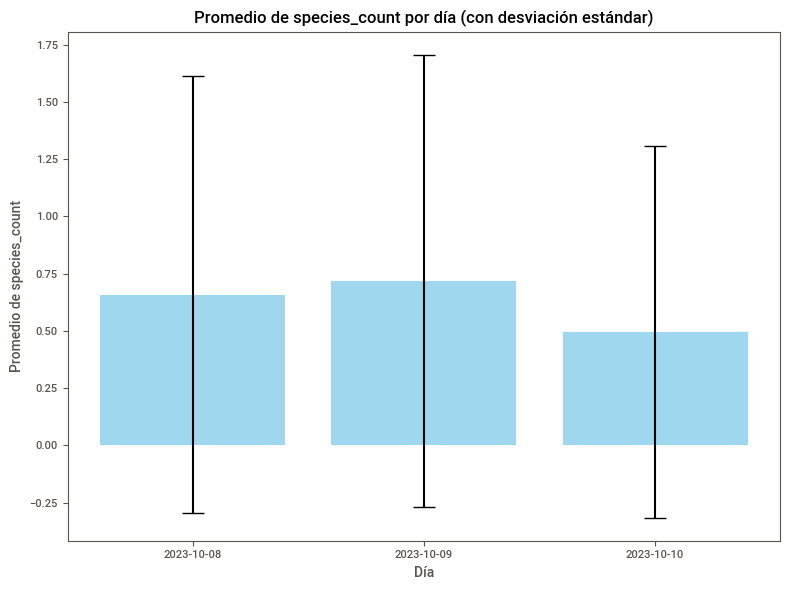

In [64]:
import pandas as pd
import matplotlib.pyplot as plt

# Calcula promedio y desviación estándar de species_count por día
df_stats = df.groupby('day')['species_count'].agg(['mean', 'std']).reset_index()

# Gráfico de barras con barras de error (desviación estándar)
plt.figure(figsize=(8, 6))
plt.bar(df_stats['day'].astype(str), df_stats['mean'], yerr=df_stats['std'], 
        color='skyblue', capsize=8, alpha=0.8)
plt.xlabel('Día')
plt.ylabel('Promedio de species_count')
plt.title('Promedio de species_count por día (con desviación estándar)')
plt.tight_layout()
plt.show()



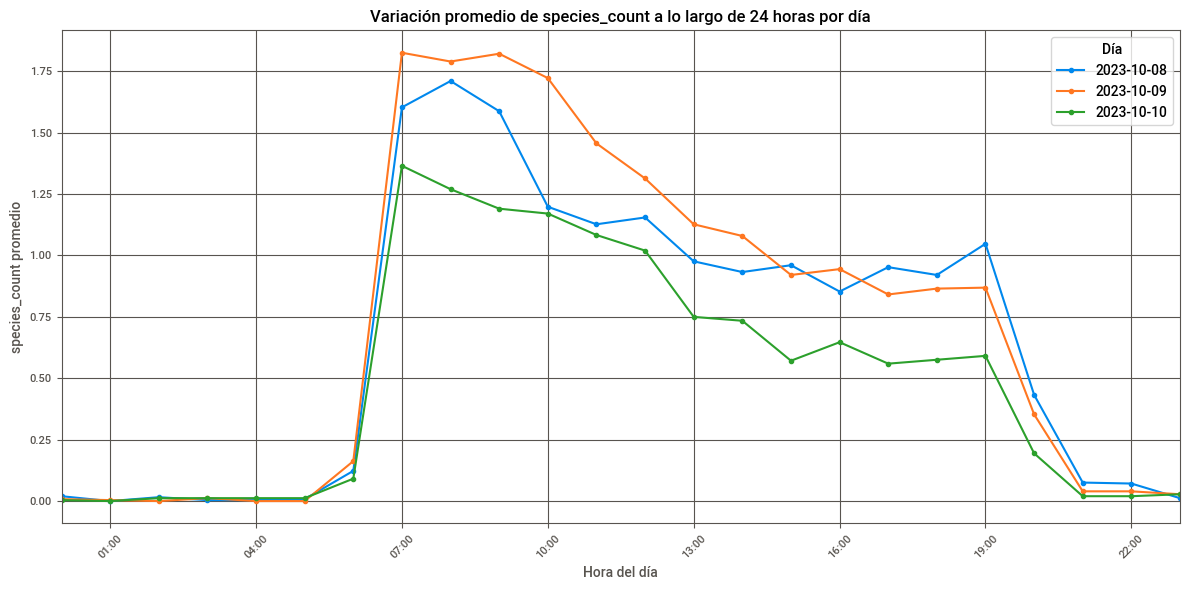

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Asegúrate de que datetime_5min sea datetime
df['datetime_5min'] = pd.to_datetime(df['datetime_5min'])

# Extrae la hora redondeada (puedes cambiar a .dt.floor('H') si quieres por hora exacta)
df['hora'] = df['datetime_5min'].dt.hour

# Calcula el promedio (o suma) de species_count por hora y día
df_agg = df.groupby(['day', 'hora'])['species_count'].mean().reset_index()

# Crea una columna datetime para graficar (usando fecha base)
fecha_base = pd.Timestamp('2023-01-01')
df_agg['time_dt'] = fecha_base + pd.to_timedelta(df_agg['hora'], unit='h')

# Grafica una línea por día
fig, ax = plt.subplots(figsize=(12, 6))
for day, group in df_agg.groupby('day'):
    ax.plot(group['time_dt'], group['species_count'], marker='o', label=str(day))

# Configura el eje x de 00:00 a 23:00 y etiquetas cada 3 horas
ax.set_xlim(fecha_base, fecha_base + pd.Timedelta(hours=23))
ax.xaxis.set_major_locator(mdates.HourLocator(interval=3))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

plt.xlabel('Hora del día')
plt.ylabel('species_count promedio')
plt.title('Variación promedio de species_count a lo largo de 24 horas por día')
plt.legend(title='Día')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Insights

...


### Respecto al espacio

Para estos análisis se utilizará el conjunto de datos remuestrados cada 5 minutos.

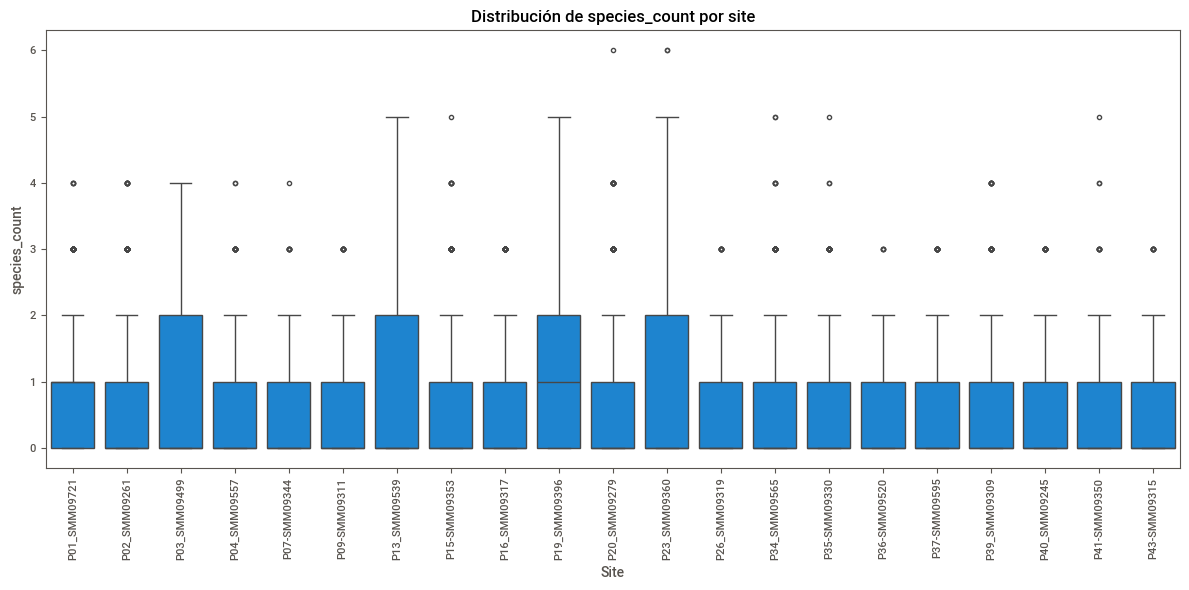

In [65]:
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.boxplot(x='site', y='species_count', data=df)
plt.xticks(rotation=90)
plt.xlabel('Site')
plt.ylabel('species_count')
plt.title('Distribución de species_count por site')
plt.tight_layout()
plt.show()
